In [1]:
library(tidyverse)
library(magrittr) # required for bi-directional pipes only, not strictly needed.

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.1.1     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'magrittr'


The following object is masked from 'package:purrr':

    set_names


The following object is masked from 'package:tidyr':

    extract




In [2]:
library(GCDkitDevelop)

Loading required package: tcltk

Patching.... please wait




Initializing the EarthChem interface....
R proxy:  
System proxy:  


Loading required package: XML

Windows version: Windows 10 x64 (build 19042)

R version: x86_64-w64-mingw324.1.2


Geochemical Data Toolkit (GCDkitDevelop) 6.1,
built R 4.1.2; ; 2022-02-11 16:38:59 UTC; windows


Please support our efforts and cite the package 'GCDkitDevelop' in publications
using the reference below. Type 'citation("GCDkitDevelop")' for BibTex version.


Vojtech Janousek, Colin M. Farrow and Vojtech Erban (2006).

Interpretation of whole-rock geochemical data in igneous geochemistry:

introducing Geochemical Data Toolkit (GCDkit).

Journal of Petrology 47(6): 1255-1259.

doi: 10.1093/petrology/egl013



A platform different from RGUI!
Still experimental...




Tcl/Tk functions initialized.

Ready 2 Go - Enjoy!


Attaching package: 'GCDkitDevelop'


The following object is masked from 'package:ggplot2':

    annotate


The following object is masked from 'package:graphics':

    plot.default




NB that there is a conflict, GCDkit and ggplot both use annotate. It is probably wise to explicitely use GCDkit::annotate() or ggplot2::annotate(), as the case may be.

In both case the problem is that annotate() is used deep down in the code, rather than in direct user input. I *think* that ggplot is always using explicit calls (ggplot2::annotate() ) and I sure hope GCDkit does, too. In any case, I'm loading GCDkit last, so GCDkit's version will overwrite ggplot's and an unqualified annotate() will point to GCDkit.

In [3]:
data(sazava)
accessVar("sazava")

R data 
......
... 


ERROR: Error in if (length(ee) > 1 | names(ee)[1] == "Empty") {: argument is of length zero


This is not working in jupyter ! Or, rather, it works (check ``WR``) but returns an error.

## ggplot2 equivalents for binary()

ggplot works on tibbles, a specialized kind of data.frame. The first step is to convert the data into a tibble. 

On the other hand df's and tbl's have no problems with mixed data types, so there is no need to split into labels and WR.

On the third hand, tbl's do not have rownames() (which will come back to bite us latter...)

In [4]:
sazava %<>% as_tibble()

In [5]:
sazava

Intrusion,Locality,Petrology,Outcrop,Symbol,Colour,SiO2,TiO2,Al2O3,FeO,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Cs,Ta,Hf
<fct>,<fct>,<fct>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Sazava,Mrac,bi-amph quartz diorite,working quarry,10,4,59.98,0.63,16.42,5.46,...,NA,NA,NA,NA,NA,NA,25,NA,NA,NA
Sazava,Mrac,bi-amph quartz diorite,working quarry,10,4,55.17,0.71,17.00,5.26,...,NA,NA,NA,NA,NA,NA,30,NA,NA,NA
Sazava,Mrac,bi-amph quartz diorite,working quarry,10,4,55.09,0.75,17.59,5.81,...,NA,NA,NA,NA,NA,NA,30,NA,NA,NA
Sazava,Mrac,bi-amph quartz diorite,working quarry,10,4,50.72,0.83,17.57,7.65,...,5.80,1.03,2.80,0.43,2.88,0.43,38,5.7,0.5,2.5
Sazava,Teletin,bi-amph tonalite,disused quarry,10,1,57.73,0.95,18.82,5.43,...,2.70,0.56,1.64,0.24,1.52,0.25,24,6.6,0.6,3.6
basic,Teletin,bi-amph quartz diorite,disused quarry,8,1,52.90,1.35,18.23,7.24,...,NA,NA,NA,NA,NA,NA,36,2.3,1.1,1.8
basic,Pecerady,px-amph gabbro,disused quarry,19,1,49.63,0.76,13.34,5.69,...,NA,NA,NA,NA,NA,NA,20,NA,NA,NA
basic,Pecerady,px-amph gabbro,disused quarry,19,1,51.72,0.67,14.17,6.43,...,NA,NA,NA,NA,NA,NA,19,NA,NA,NA
basic,Vavretice,amph-bi qtz gabbrodiorite,disused quarry,19,1,48.84,0.34,21.64,2.74,...,NA,NA,NA,NA,NA,NA,10,NA,NA,NA


In ggplot2, you use themes to configure the graph appearance. GCDkit's visual appearance can be emulated with

In [6]:
theme_gcdkit <- function () { 
  theme_bw(base_size=12, base_family="Avenir") %+replace% 
    theme(
      panel.background  = element_blank(),
      plot.background = element_blank(), 
      legend.background = element_rect(fill="transparent", colour=NA),
      legend.key = element_rect(fill="transparent", colour=NA),
      panel.grid = element_blank(),
      axis.title.x = element_text(size=14, colour = "black"),
      axis.title.y = element_text(size=14, colour = "black",angle=90),
      axis.text.x = element_text(size=12, colour = "black"),
      axis.text.y = element_text(size=12, colour = "black",angle=90),
      axis.ticks.length = unit(.25, "cm")
    )
}

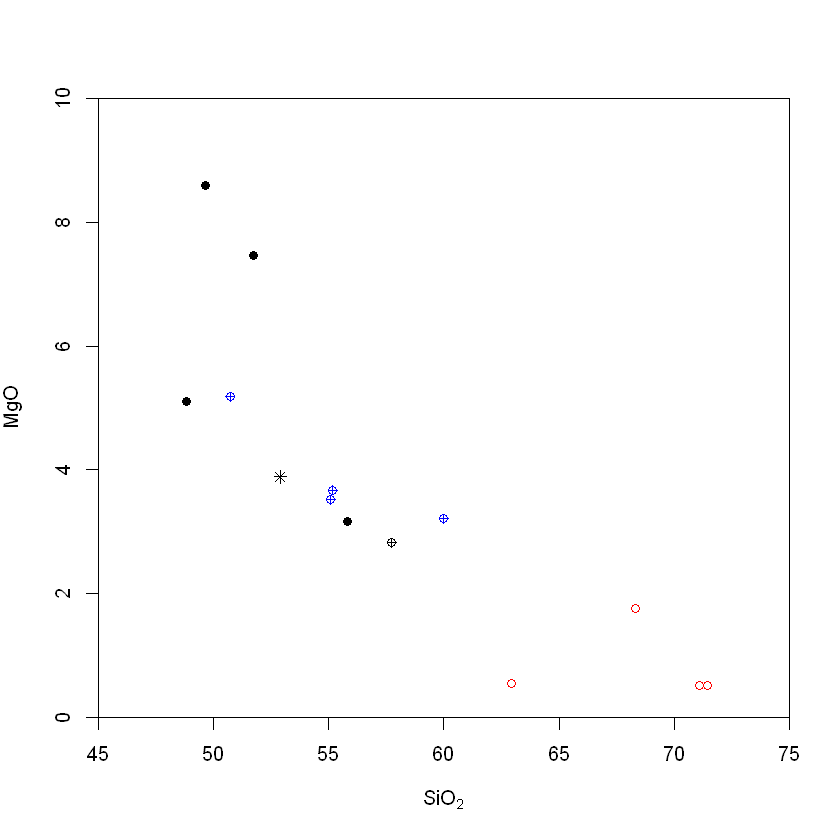

In [7]:
binary("SiO2","MgO",new=F) ##GCDkit

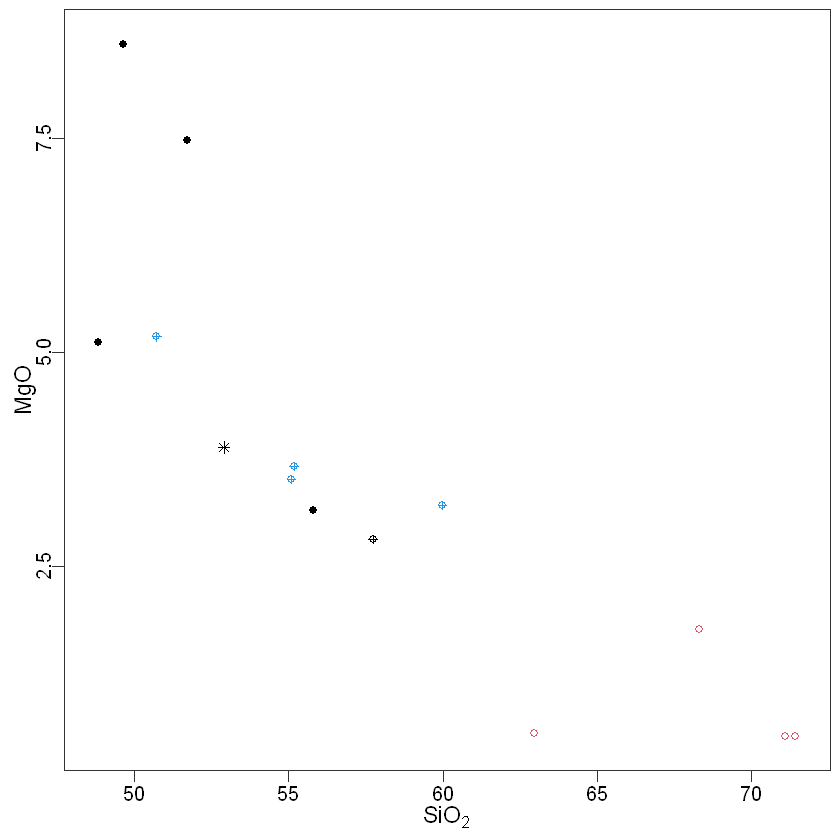

In [8]:
p<- sazava %>% 
    ggplot()+
    geom_point(aes(x=SiO2,y=MgO,colour=Colour,shape=Symbol,size=2))+
    scale_shape_identity()+
    scale_color_identity()+
    scale_size_identity()+
    labs(x=GCDkitDevelop::annotate("SiO2"),y="MgO")+
    theme_gcdkit()

p

Wrapping this in a function is doable, although it requires a little bit of juggling with data types (because of ggplot's slightly too clever "tidy evaluation" : https://cran.r-project.org/web/packages/ggplot2/vignettes/ggplot2-in-packages.html and https://dplyr.tidyverse.org/articles/programming.html). 

Also, the default scale on the axes is not exactly the same because plotWithLimits uses .round.max.up() and friends to manually define the limits.

The size of symbols also requires a bit of tweaking, I have not exactly found out the correspondance between a ggplot size and a plain R size (it is partly device-dependent, it is not the same in jupyter and in RGui for instance.. ). Here, 2 mm look about right. The following seems to work reasonably fine to get the conversion factor :

In [ ]:
pointsize = par("ps")
point_size_magic_nbr <- pointsize/5

In case you ask: of course you can use complex expressions... with a bit of help from GCDkit's labeller in this case...

In [ ]:
p0<- sazava %>% 
    ggplot()+
    geom_point(aes(x=SiO2/Al2O3,y=(MgO+FeO)^2,colour=Colour,shape=Symbol,size=2))+
    scale_shape_identity()+
    scale_color_identity()+
    scale_size_identity()+
    labs(x=GCDkitDevelop::annotate("SiO2/Al2O3"),y="(MgO+FeO)^2")+
    theme_gcdkit()

p0

## Options to binary()

In [ ]:
binary("SiO2","MgO",new=F,log="y")

The beauty of ggplot is that the figure is stored in a ggplot object that you can modify, so:

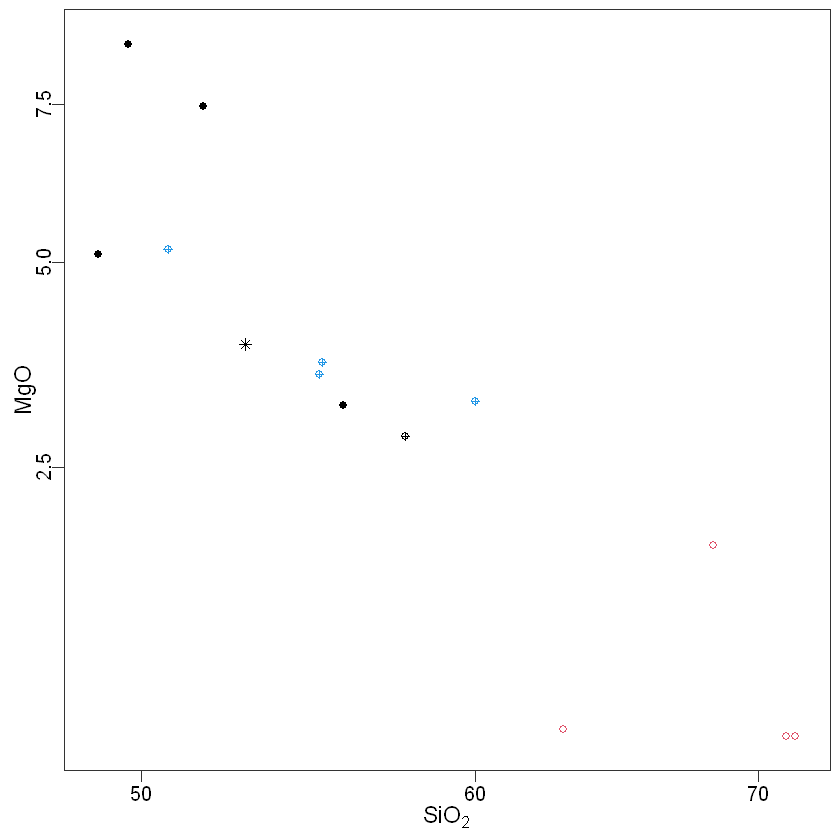

In [12]:
p+scale_x_log10()+scale_y_sqrt()

## Tweaking the graph

Most of what figaro does (and, in fact, some more) can be easily done with ggplot objects. 

Customizing the visual appearance, for instance, is no more complicated than using another theme (see package ``ggtheme`` for more themes):

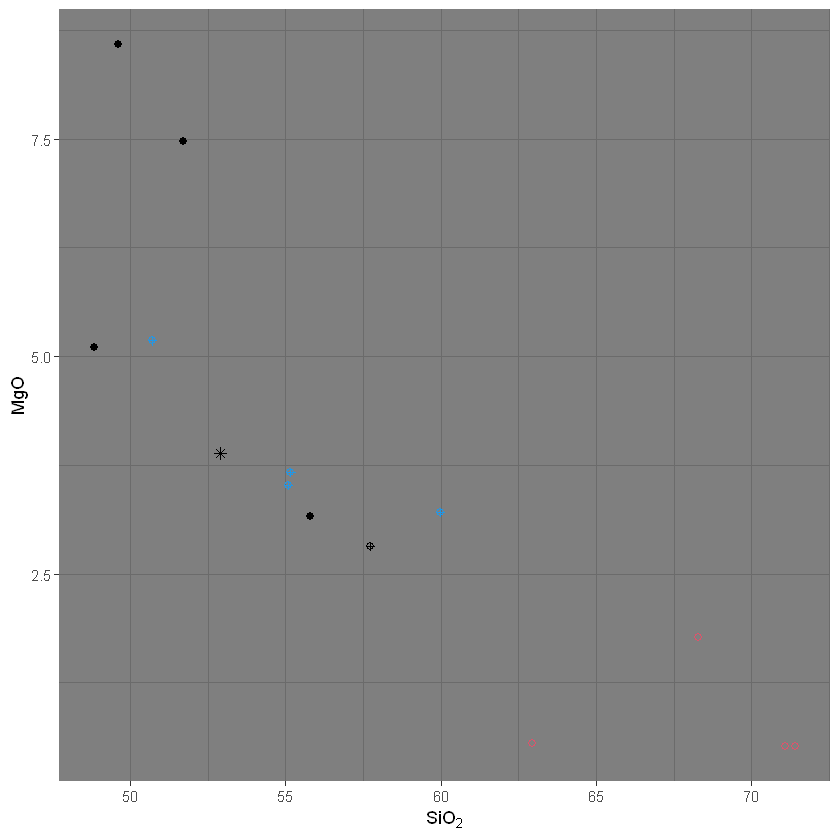

In [13]:
p+theme_dark()

In [ ]:
p+theme_bw()

In [ ]:
p+theme_classic()

In [ ]:
p+theme_minimal()

## Figaro-like changes
### figMain() , figSub(), figXlab(), figYlab()


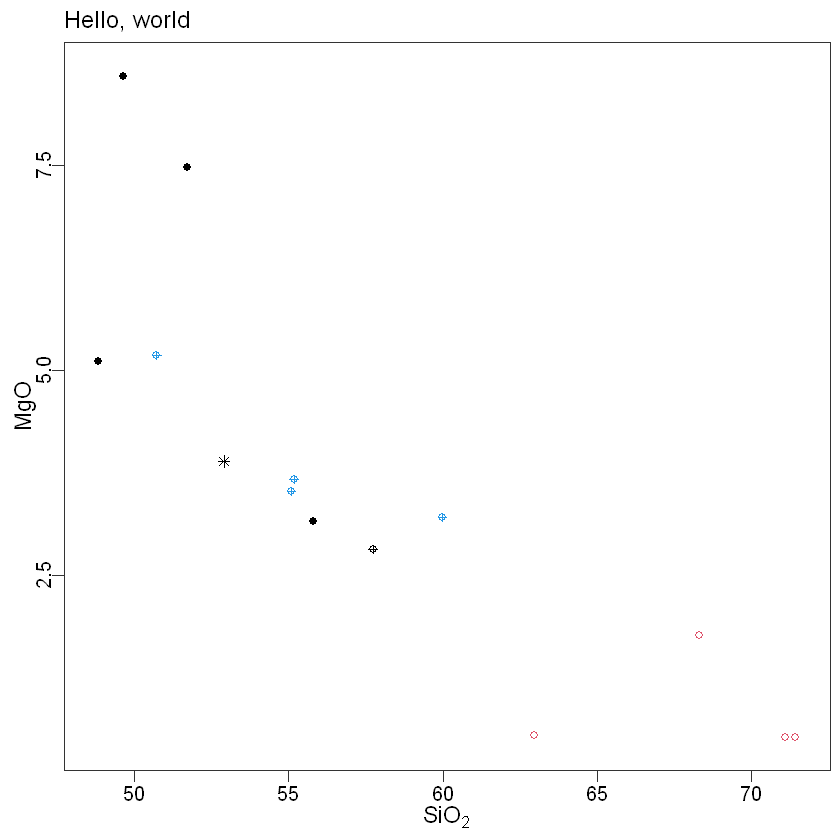

In [14]:
p+labs(title="Hello, world")

Use theme to further customize the title, for full GCDkit-like emulation:

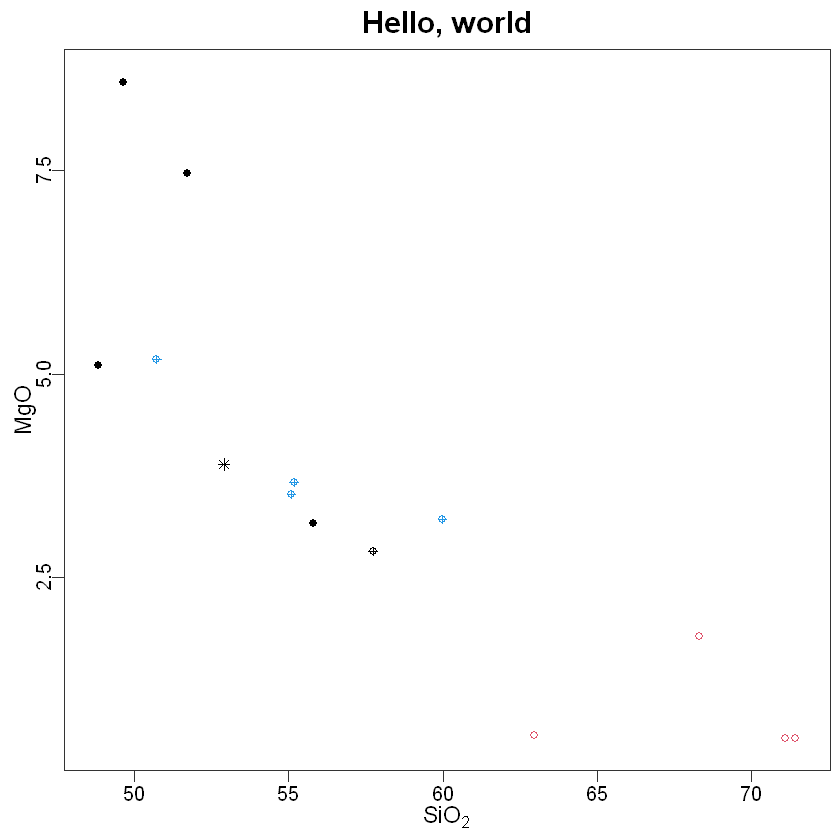

In [15]:
p+labs(title="Hello, world")+
theme(plot.title=element_text(size=18, face="bold", colour = "black",hjust=0.5))

Likewise use labs(subtitle="foo") or labs(caption="bar") for more text; labs(x="X label",y="Y label") for axis labels

### Colours of text: figCol(), figColMain(), figColSub(), figBw()

Text are customized with themes:

In [ ]:
p+labs(title="Hello, world")+
theme(plot.title=element_text(size=18, face="bold", colour = "red",hjust=0.5))

Note that in this way, you can customize all texts (axis labels with axis.title, numbers with axis.text, and so on):


In [ ]:
p+labs(title="Hello, world")+
theme(axis.text.x=element_text(colour = "green"),
      axis.text.y=element_text(angle=35),
      axis.title.x=element_text(size=18, face="bold", colour = "red"),
      axis.title.y=element_text(size=18,family="serif",face="italic", colour = "blue") )

Read https://ggplot2.tidyverse.org/reference/theme.html for a list of all the possibilities...

### Colour of symbols

An important think to understand is that the use of colours (and symbols) are subtly different in GCDkit and ggplot. In GCDkit, colours are hard-coded variables that are part of the dataset. In ggplot, colours represent a variable, but the colour scale is managed separately. Hence the two calls: colour=Colour in the first call (to aes(), the *aesthetics mapping* of the graph) means that the colours represent the content of the variable Colour (a number, in this case). scale_color_identity() defines the scale (the color code) to use, in this case the value of the variable.

You may change the colour scale (remember, it is a numeric in this dataset, so we use a *continous* scale even if you and I know there are only three values in this file):

In [ ]:
p+scale_color_gradient(low="pink",high="green")

If you want to use a *discrete* colour scale, you need to base it on a discrete attribute. Here I first create a new attribute, that is discrete (character)
(note the use of tidyR syntax with pipes and "mutate" to add a column to the dataframe. An R equivalent would be

``sazava2<-cbind(sazava,col2=as.character(sazava$Colour))``

In [17]:
sazava2 <- sazava %>% mutate(col2=as.character(Colour))
sazava2

Intrusion,Locality,Petrology,Outcrop,Symbol,Colour,SiO2,TiO2,Al2O3,FeO,...,Ho,Er,Tm,Yb,Lu,Y,Cs,Ta,Hf,col2
<fct>,<fct>,<fct>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>
Sazava,Mrac,bi-amph quartz diorite,working quarry,10,4,59.98,0.63,16.42,5.46,...,NA,NA,NA,NA,NA,25,NA,NA,NA,4
Sazava,Mrac,bi-amph quartz diorite,working quarry,10,4,55.17,0.71,17.00,5.26,...,NA,NA,NA,NA,NA,30,NA,NA,NA,4
Sazava,Mrac,bi-amph quartz diorite,working quarry,10,4,55.09,0.75,17.59,5.81,...,NA,NA,NA,NA,NA,30,NA,NA,NA,4
Sazava,Mrac,bi-amph quartz diorite,working quarry,10,4,50.72,0.83,17.57,7.65,...,1.03,2.80,0.43,2.88,0.43,38,5.7,0.5,2.5,4
Sazava,Teletin,bi-amph tonalite,disused quarry,10,1,57.73,0.95,18.82,5.43,...,0.56,1.64,0.24,1.52,0.25,24,6.6,0.6,3.6,1
basic,Teletin,bi-amph quartz diorite,disused quarry,8,1,52.90,1.35,18.23,7.24,...,NA,NA,NA,NA,NA,36,2.3,1.1,1.8,1
basic,Pecerady,px-amph gabbro,disused quarry,19,1,49.63,0.76,13.34,5.69,...,NA,NA,NA,NA,NA,20,NA,NA,NA,1
basic,Pecerady,px-amph gabbro,disused quarry,19,1,51.72,0.67,14.17,6.43,...,NA,NA,NA,NA,NA,19,NA,NA,NA,1
basic,Vavretice,amph-bi qtz gabbrodiorite,disused quarry,19,1,48.84,0.34,21.64,2.74,...,NA,NA,NA,NA,NA,10,NA,NA,NA,1


.. and I use it for my colour mapping, which I can now modify:

In [ ]:
p2<- sazava2 %>% 
    ggplot()+
    geom_point(aes(x=SiO2,y=MgO,colour=col2,shape=Symbol,size=2))+
    scale_shape_identity()+
    scale_color_identity()+
    scale_size_identity()+
    labs(x=GCDkitDevelop::annotate("SiO2"),y="MgO")+
    theme_gcdkit()

p2

In [ ]:
p2 + scale_colour_manual(values=c("green","brown","pink"))

Or of course, emulating figCol() or figBw():

In [ ]:
p2 + scale_colour_manual(values=c("green","green","green"))

But, in this case, does it really make sense to refer to the variable "Colour", rather than something a bit more explicit ? So perhaps try

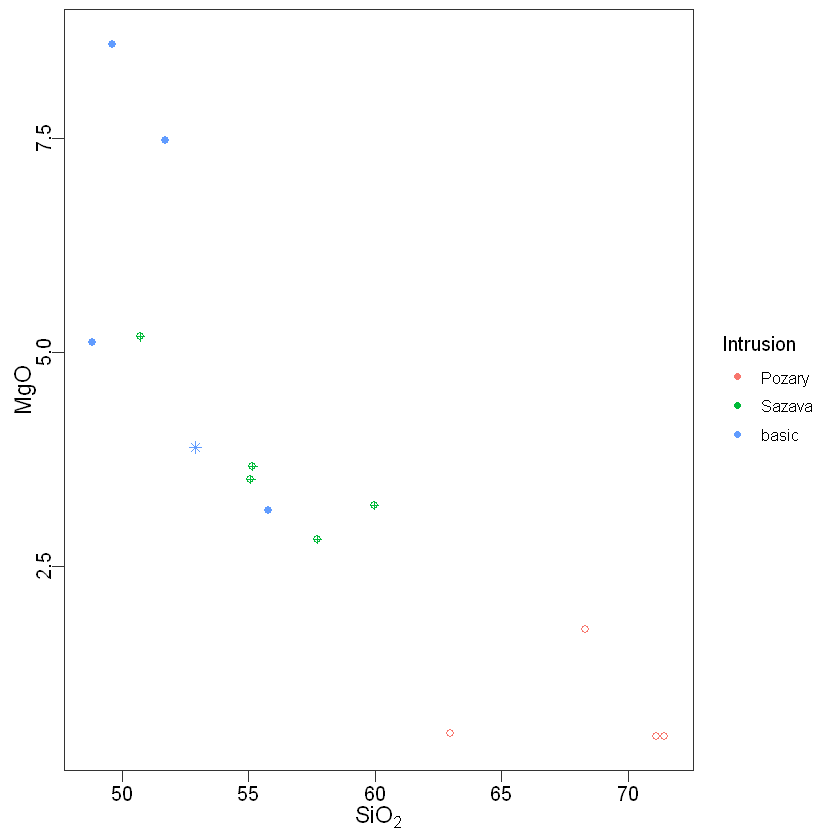

In [18]:
p3<- sazava2 %>% 
    ggplot()+
    geom_point(aes(x=SiO2,y=MgO,colour=Intrusion,shape=Symbol,size=2))+
    scale_shape_identity()+
    scale_size_identity()+
    labs(x=GCDkitDevelop::annotate("SiO2"),y="MgO")+
    theme_gcdkit()
p3

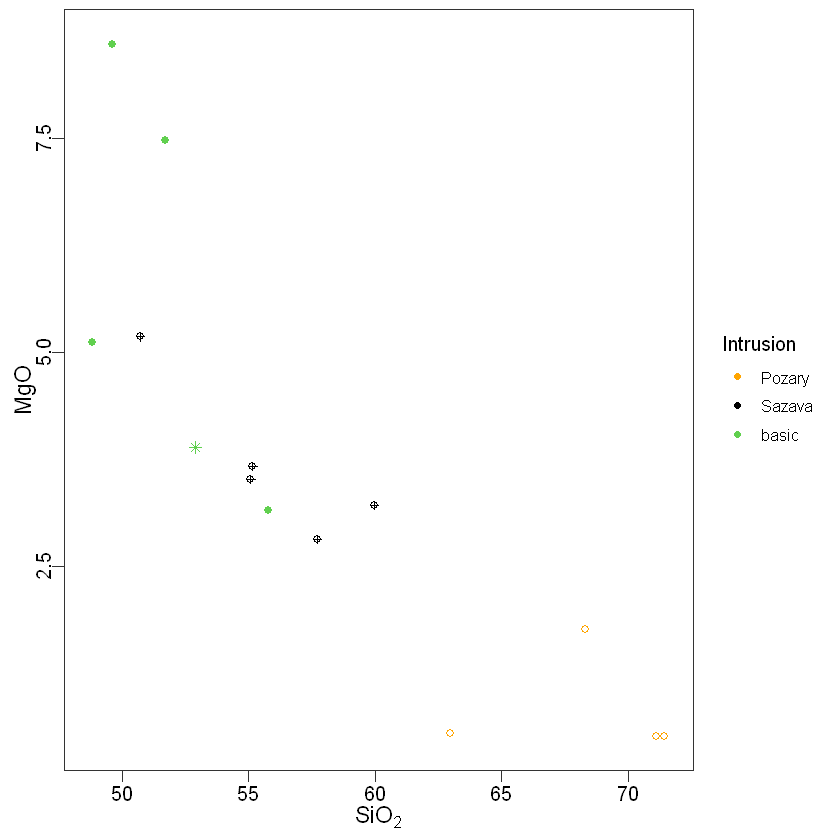

In [19]:
p3+scale_colour_manual(values=c("orange","black","3"))

Of course, you can also elect to build a graph where colour means nothing at all (which is a different graph, from ggplot's perspective):

In [ ]:
p4<- sazava %>% 
    ggplot()+
    geom_point(aes(x=SiO2,y=MgO,colour="black",shape=Symbol,size=2))+
    scale_shape_identity()+
    scale_color_identity()+
    scale_size_identity()+
    labs(x=GCDkitDevelop::annotate("SiO2"),y="MgO")+
    theme_gcdkit()

p4

### More variables

The fact that ggplot can map different variable to graphical properties makes it very easy to make xyz plots (`` plotWithCircles()``), or to map a colour to a variable (``assignColVar()``/``assignColLab()``). Again in ggplot's perspective you are changing the *mappings* so it's a new plot:

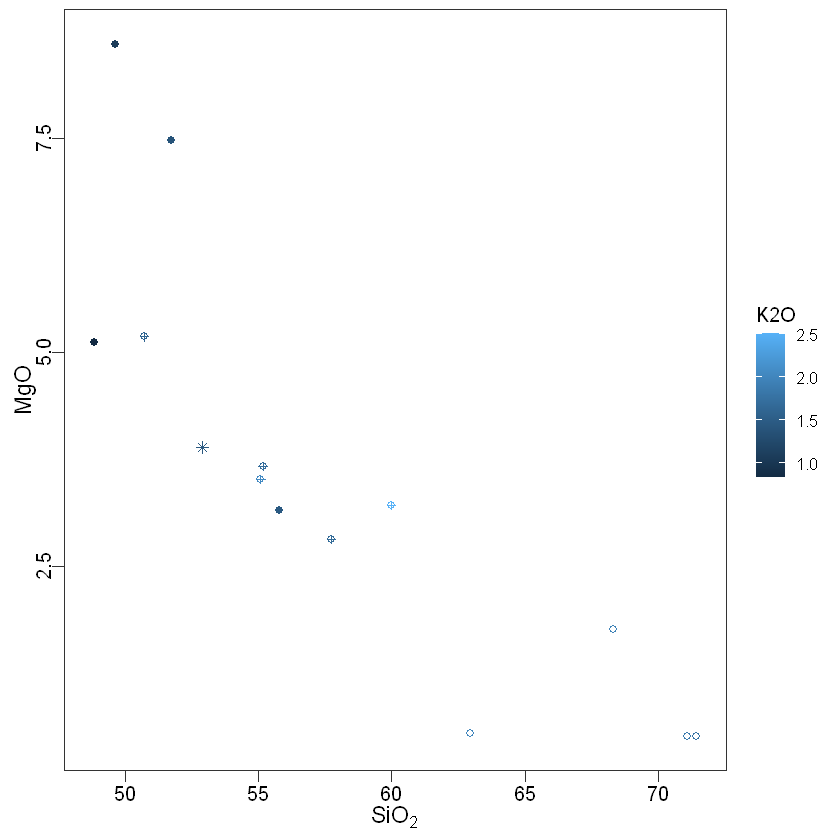

In [20]:
p5<- sazava %>% 
    ggplot()+
    geom_point(aes(x=SiO2,y=MgO,colour=K2O,shape=Symbol,size=2))+
    scale_shape_identity()+
    scale_size_identity()+
    labs(x=GCDkitDevelop::annotate("SiO2"),y="MgO")+
    theme_gcdkit()

p5

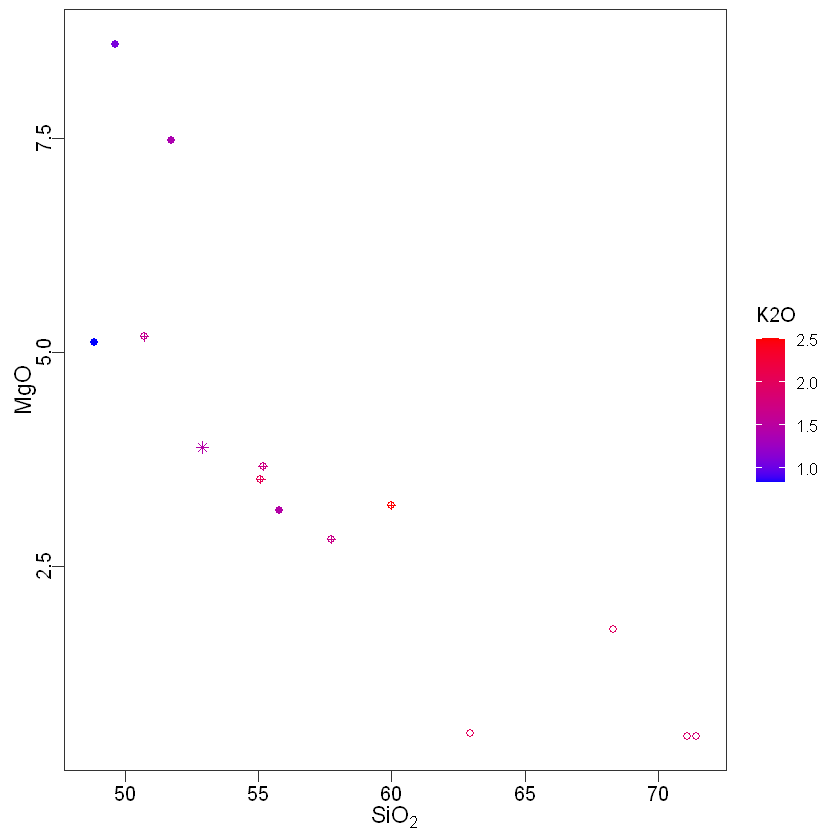

In [21]:
p5+scale_color_gradient(low="blue",high="red")

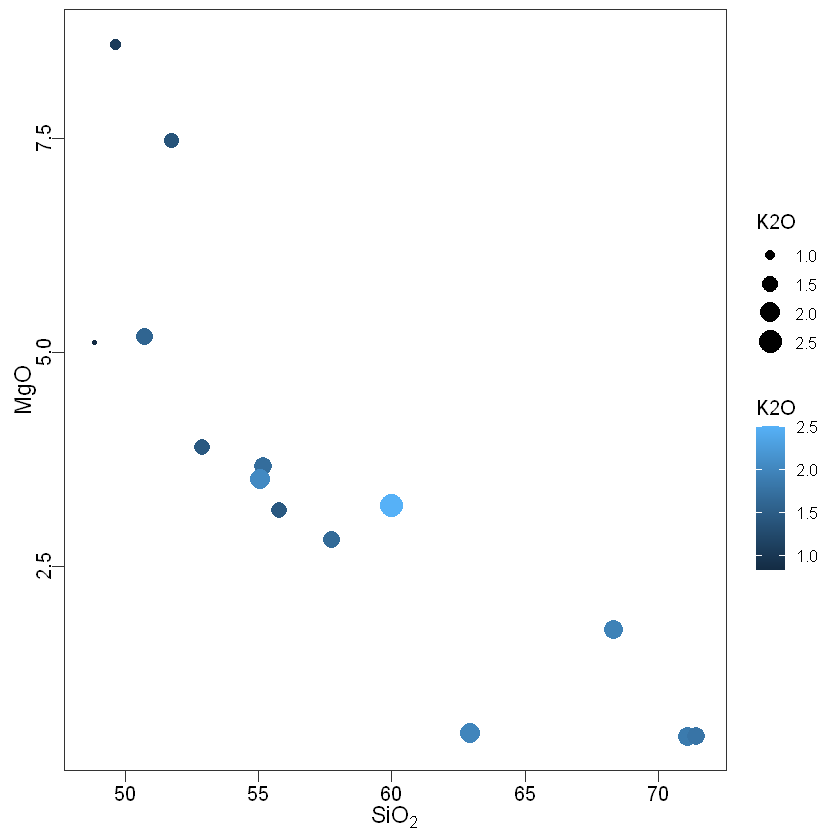

In [22]:
p6<- sazava %>% 
    ggplot()+
    geom_point(aes(x=SiO2,y=MgO,colour=K2O,shape=16,size=K2O))+
    scale_shape_identity()+
    labs(x=GCDkitDevelop::annotate("SiO2"),y="MgO")+
    theme_gcdkit()

p6

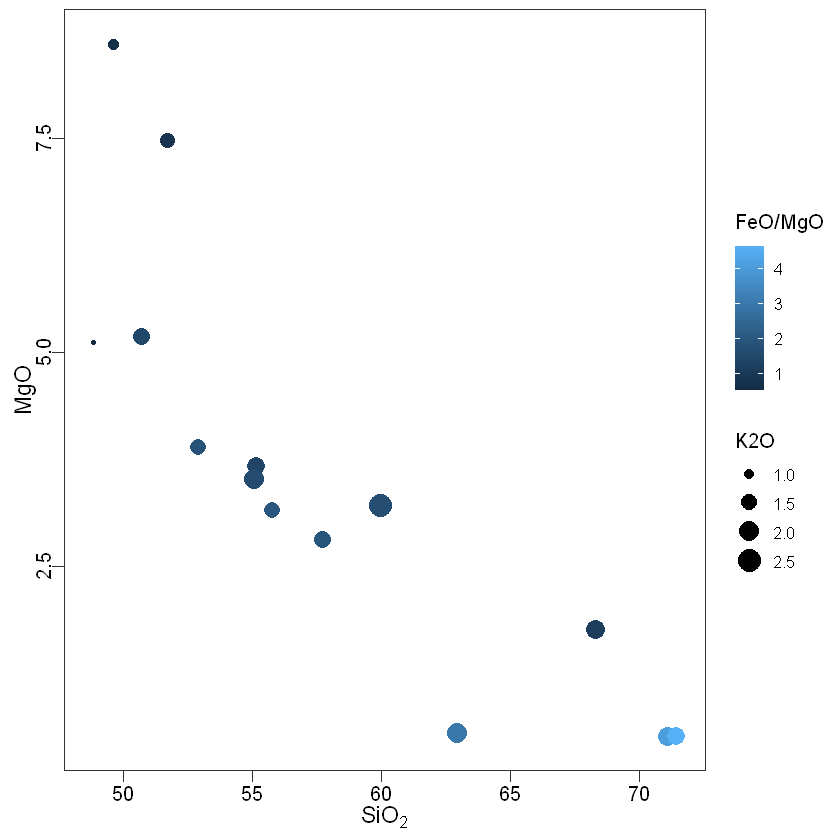

In [23]:
p7<- sazava %>% 
    ggplot()+
    geom_point(aes(x=SiO2,y=MgO,colour=FeO/MgO,shape=16,size=K2O))+
    scale_shape_identity()+
    labs(x=GCDkitDevelop::annotate("SiO2"),y="MgO")+
    theme_gcdkit()

p7

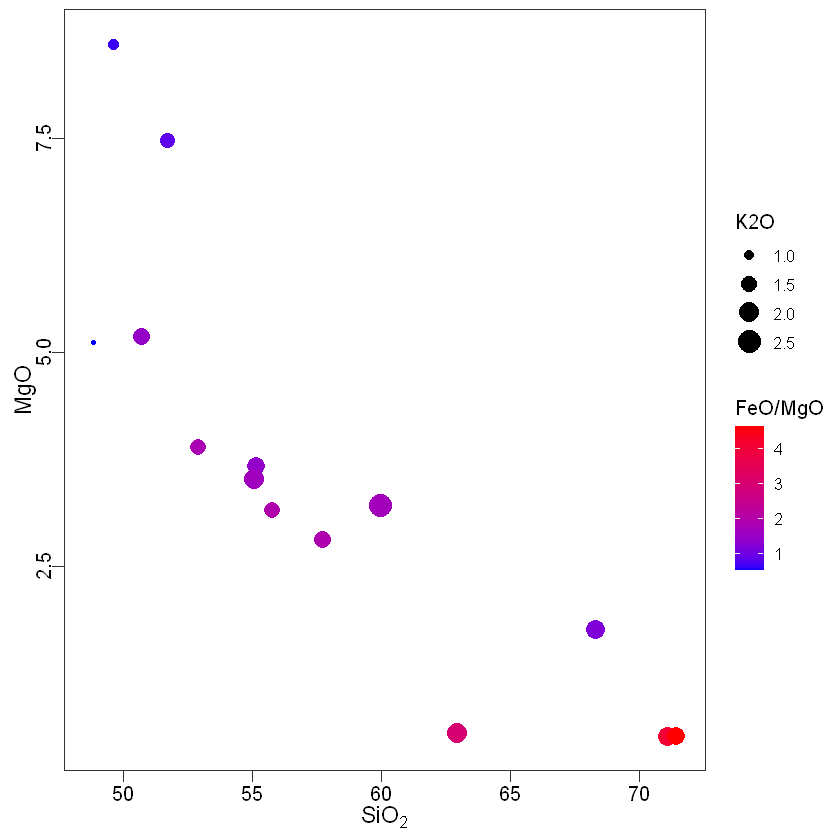

In [24]:
p7+scale_color_gradient(low="blue",high="red")

### Size of symbols

The same logic applies. In ggplot the size is one of the properties that can be mapped to a variable (as we have done for p6 and p7), or to nothing at all (size=2, in all the other graphs).

### Size of text

We have also seen that, through the use of themes.

### Zooming

Zooming can be done by customizing the x and y scales:

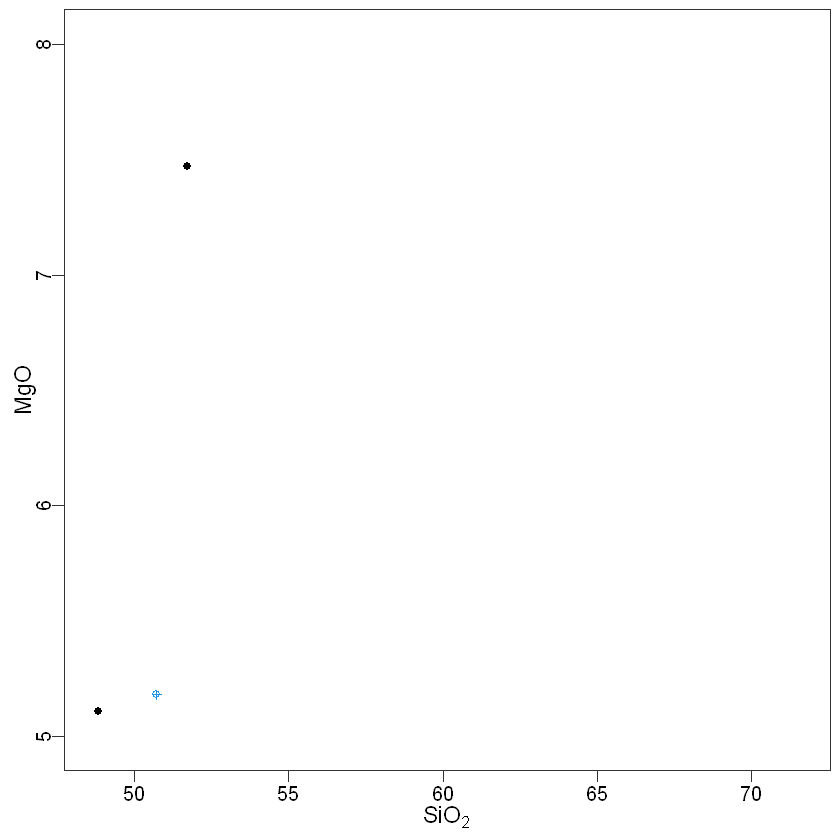

In [25]:
p + scale_y_continuous(limits=c(5,8))

Which is equivalent to

In [ ]:
p + ylim(5,8)

And subtly different (more below, but it does not matter here) from

In [ ]:
p + coord_cartesian(ylim=c(5,8))

## Identifying and labelling

There is no built-in automatic tool for that, so something similar to figIdentify() will be required.

It is, on the other hand, easy to label *all* the points:

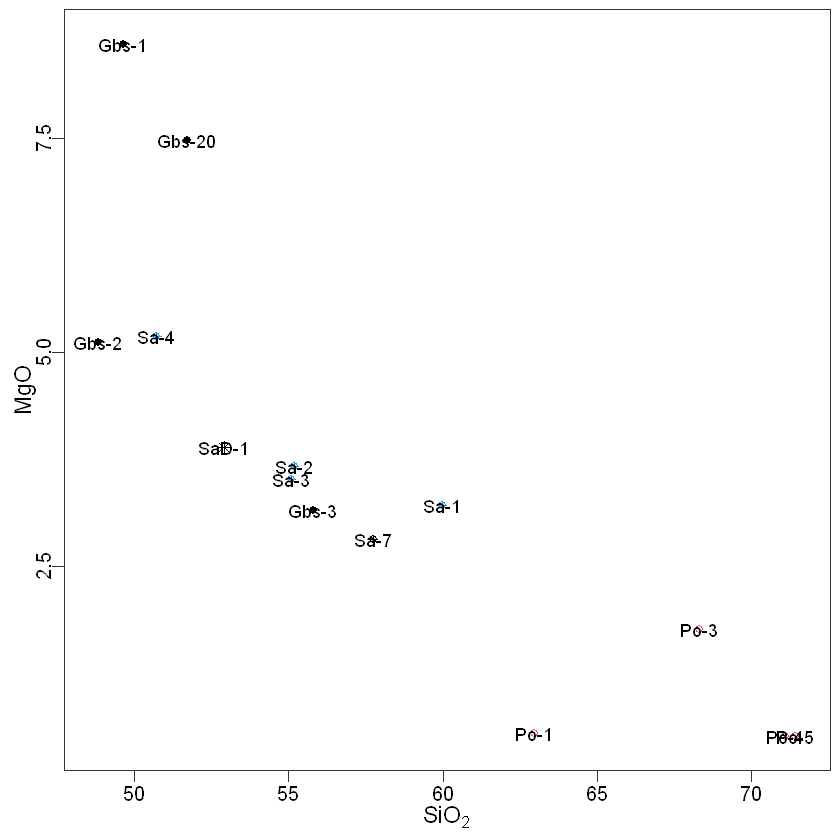

In [26]:
p+geom_text(aes(x=SiO2,y=MgO,label=rownames(WR)))

.. and you can use the usual hadj, vadj and so on.

## Interaction

Similar to point identifying, there is no built-in utility for selecting, classifying and so on. Classification, especially diagram-based, will still remain a strong point of GCDkit for the foreseeable future. Selecting and so on, we are in the realm of interactivity, for which the proper tool from the tidyverse would actually be ``shiny``.


## Multiple plots

Multiple plots are trivially easy to do in ggplot (it's called "facetting"):

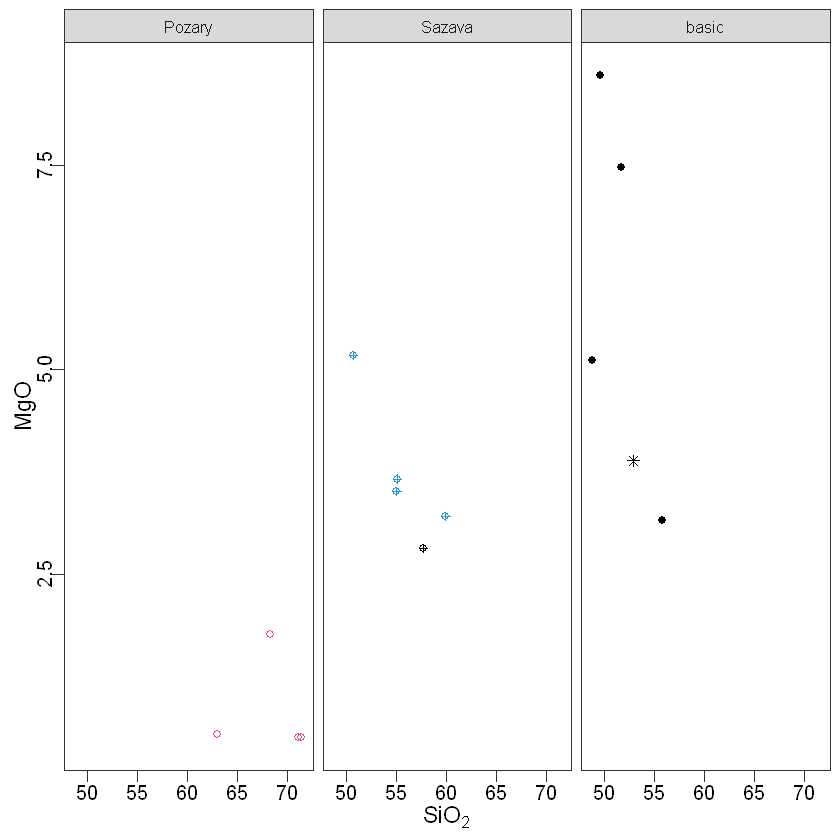

In [27]:
p+facet_wrap(~Intrusion)

Most of the task performed by grouping in the current environment can actually be dealt with by facets. "group by variable" just requires ``cut``ting the variable under consideration. "groups by label", of course, are taken care of. "group by outline" or "by diagram" aren't. 

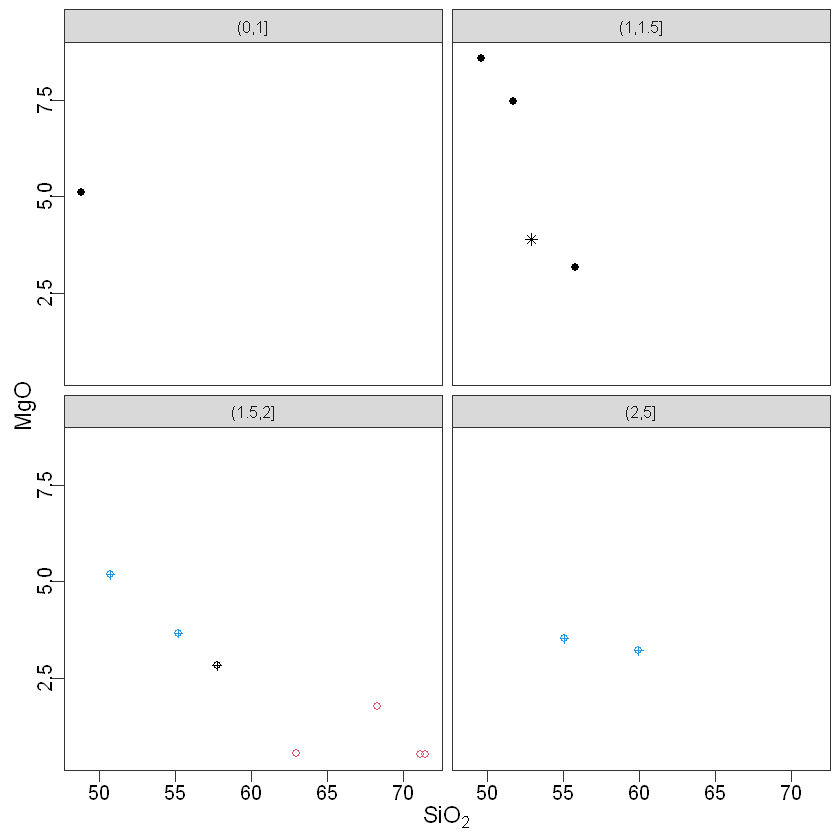

In [28]:
p+facet_wrap(~cut(K2O,c(0,1,1.5,2,5)))

## Overlaying

### Overlaying versions of the same dataset
(aka contour plots and the gang)

In ggplot parlance, you are using several geometries to depict the same data, with the same mapping. So:

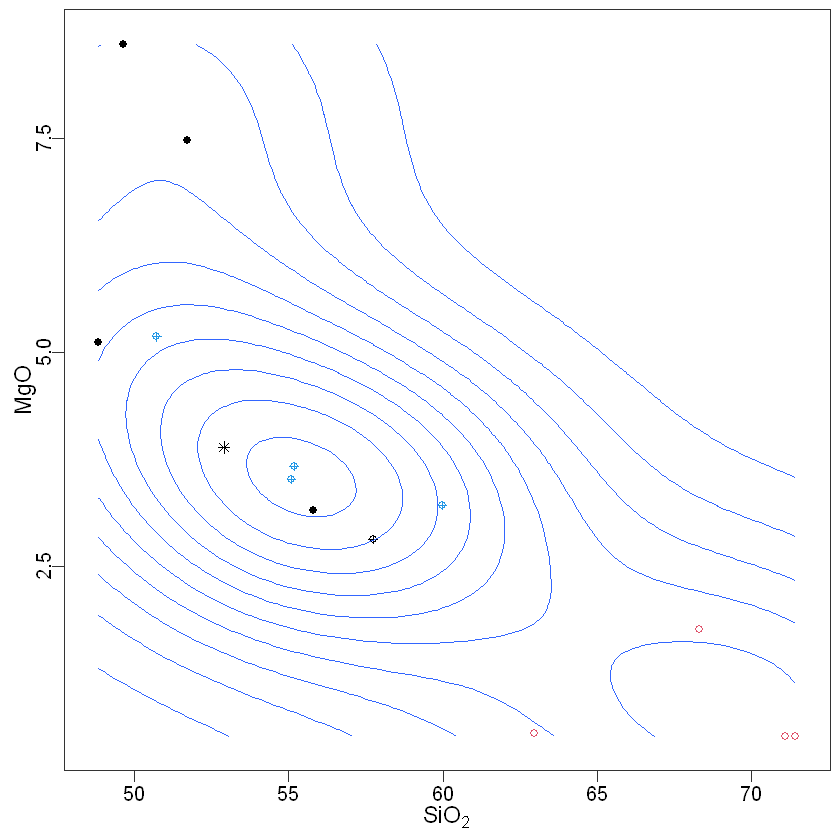

In [29]:
p+geom_density_2d(aes(x=SiO2,y=MgO))

(remember, p includes a geom_point already)

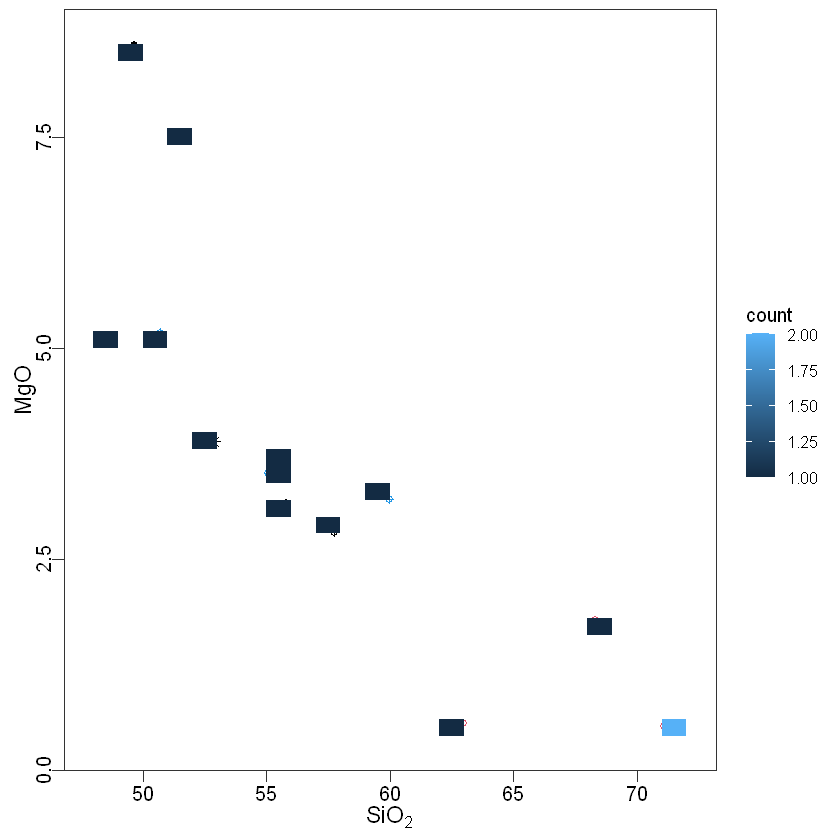

In [30]:
p+scale_y_continuous()+geom_bin2d(aes(x=SiO2,y=MgO),binwidth=c(1,0.2))

This is, incidentally, where the difference between scale_ and coord_ becomes meaningful. Consider the following plot:

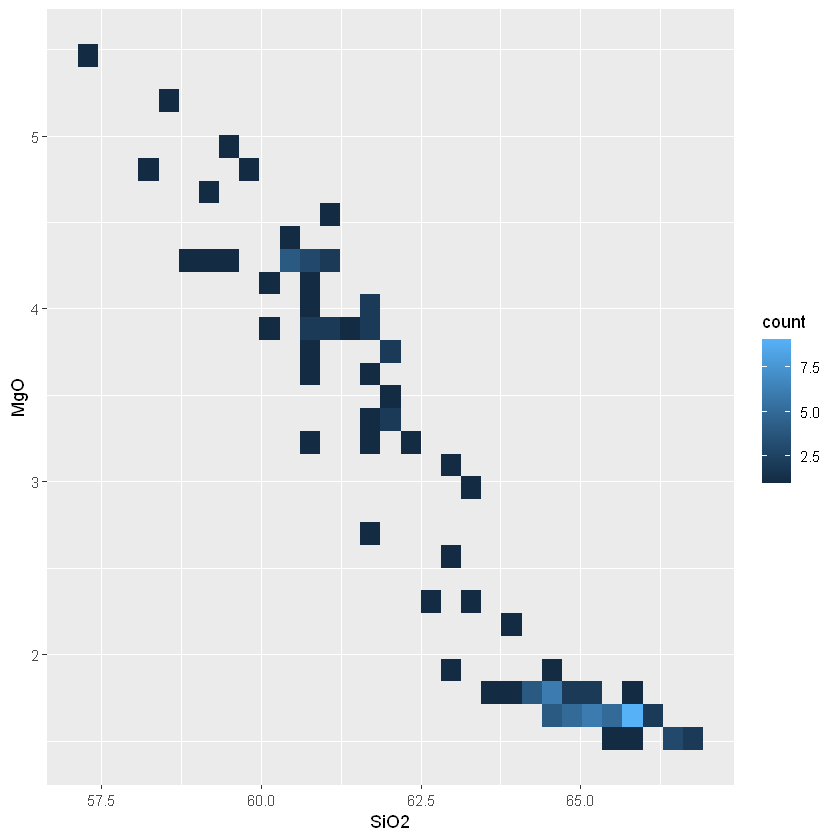

In [31]:
data(atacazo)
aa<-atacazo %>% ggplot()+geom_bin2d(aes(x=SiO2,y=MgO))
aa

and compare :

In [ ]:
aa+scale_x_continuous(limits=c(60,65))+scale_y_continuous(limits=c(3,4))

In [ ]:
aa+coord_cartesian(xlim=c(60,65),ylim=c(3,4))

The second version, as you can see, is just a (visual) zoom on a portion of the graph (including stretching of the boxes). The first case trims the dataset to keep only the relevant data and *then* counts them (cf. the lower counts).

### Overlaying another dataset

Here we take advantage of the fact, that we have ignored so far, that geometries can also take a ``data`` argument. Hence if we explicitely supplky a different data argument for each geometry, we can write

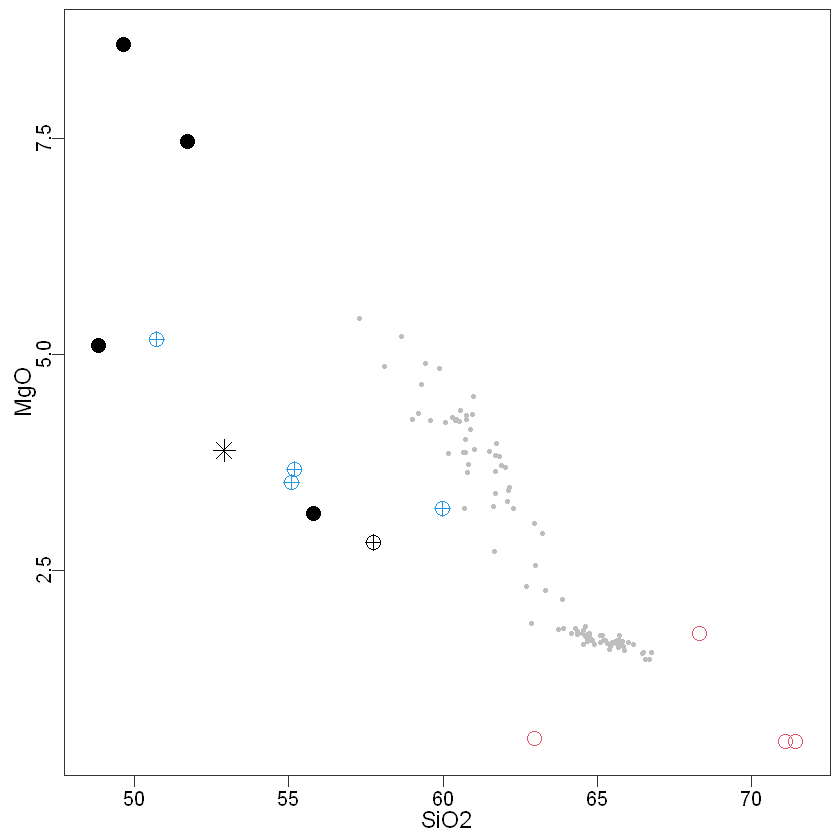

In [32]:
pp<-ggplot()+
geom_point(data=atacazo,aes(x=SiO2,y=MgO,shape=16,size=1,color="grey"))+
geom_point(data=sazava,aes(x=SiO2,y=MgO,shape=Symbol,size=4,color=Colour))+
scale_colour_identity()+
scale_shape_identity()+
scale_size_identity()+
theme_gcdkit()

pp

Of course, this remains a fully-developped ggplot graph, so...

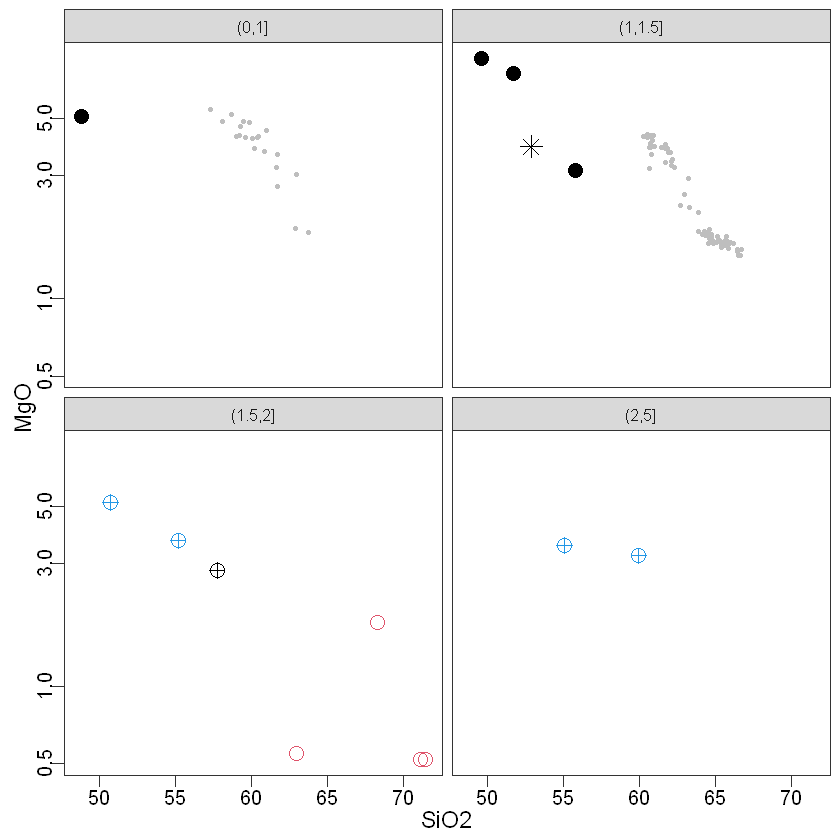

In [34]:
pp+facet_wrap(~cut(K2O,c(0,1,1.5,2,5)))+scale_y_log10()

And what about

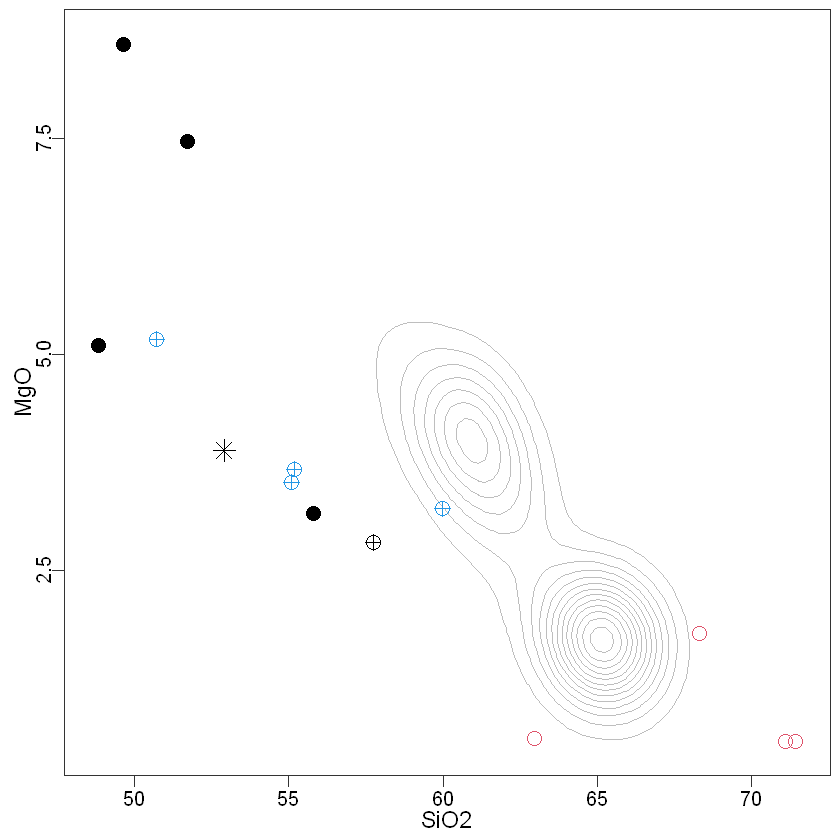

In [35]:
pp2<-ggplot()+
geom_density_2d(data=atacazo,aes(x=SiO2,y=MgO,color="grey"))+
geom_point(data=sazava,aes(x=SiO2,y=MgO,shape=Symbol,size=4,color=Colour))+
scale_colour_identity()+
scale_shape_identity()+
scale_size_identity()+
theme_gcdkit()

pp2

It becomes a bit more tricky if, for some reason, you want to use two distinct scales (one for each dataset). In that case, see package ``ggnewscale``.